### **Importing the dependencies**

In [71]:
# import all necessary libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import imblearn

# algorithms
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# nested cross validation
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# for evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import NearMiss

## **Data Collection and Analyis PIMA Diabetes Dataset**

In [72]:
# loading the diabetes dataset to a pandas DataFrame
ds=pd.read_csv("/content/diabetes.csv")

In [73]:
# printing some data
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
# number of rows and columns in the dataset
ds.shape

(768, 9)

In [75]:
# getting the statistical measures of the data
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
ds["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [77]:
ds.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## **Correlation**






In [78]:
ds.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


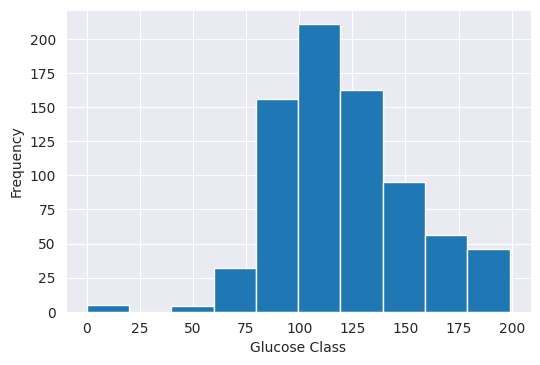

In [79]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Glucose Class')
ds['Glucose'].plot.hist()
sns.set_style(style='ticks')

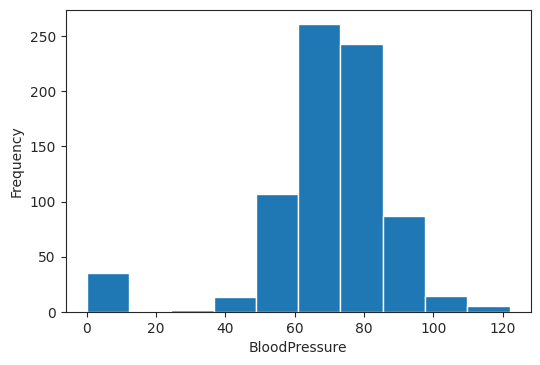

In [80]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BloodPressure')
ds['BloodPressure'].plot.hist()
sns.set_style(style='darkgrid')

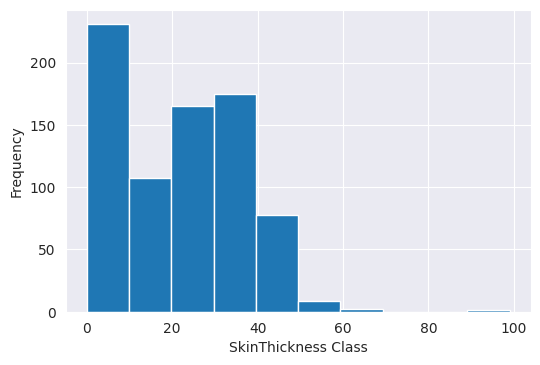

In [81]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('SkinThickness Class')
ds['SkinThickness'].plot.hist()
sns.set_style(style='dark')

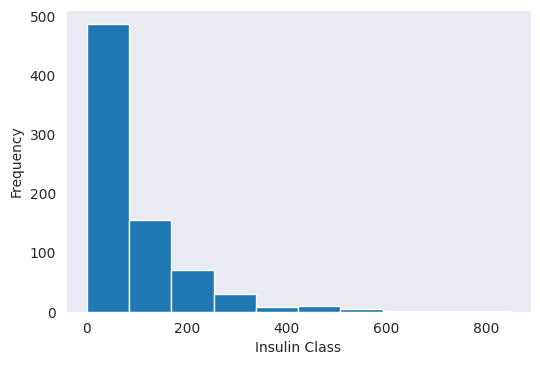

In [82]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('Insulin Class')
ds['Insulin'].plot.hist()
sns.set_style(style='white')

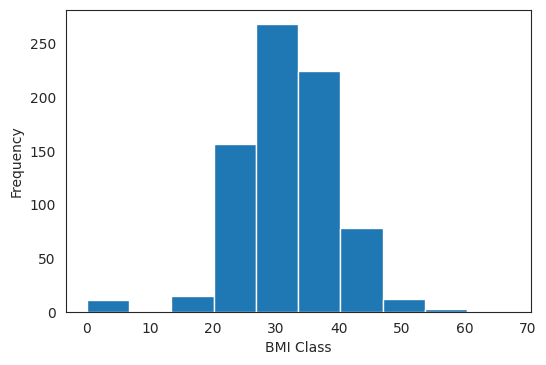

In [83]:
plt.figure(figsize=(6,4),dpi=100)
plt.xlabel('BMI Class')
ds['BMI'].plot.hist()
sns.set_style(style='darkgrid')

<Axes: title={'center': 'Checking Missing Value with Heatmap'}>

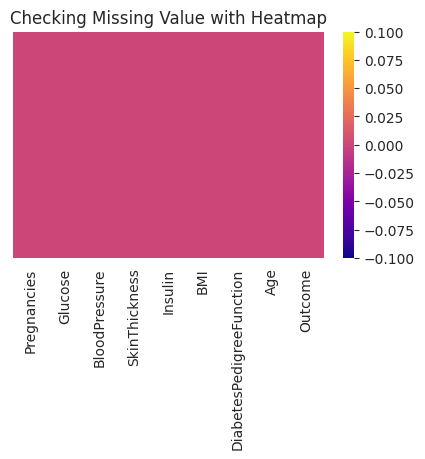

In [84]:
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(ds.isnull(),cmap='plasma',yticklabels=False)

<Axes: title={'center': 'Correlation Graph'}>

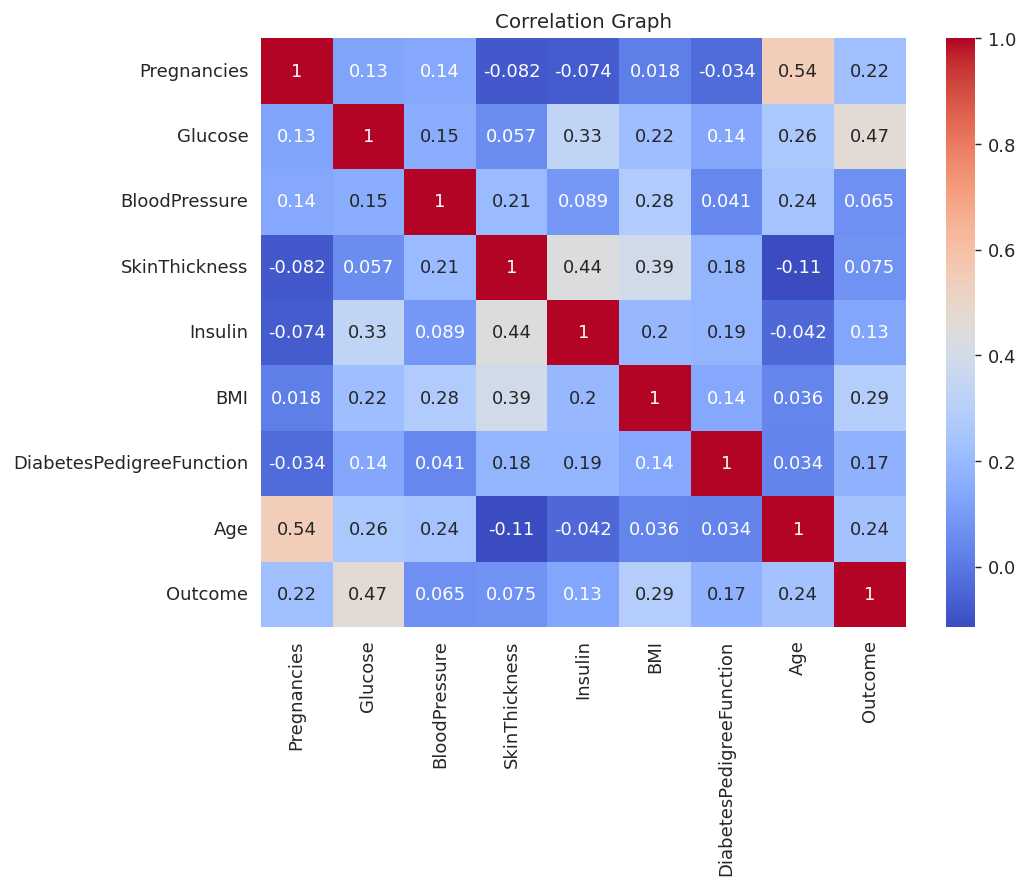

In [85]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Correlation Graph" , fontsize = 11 )
sns.heatmap (ds.corr(), annot = True , cmap="coolwarm" )

## **Visualization**

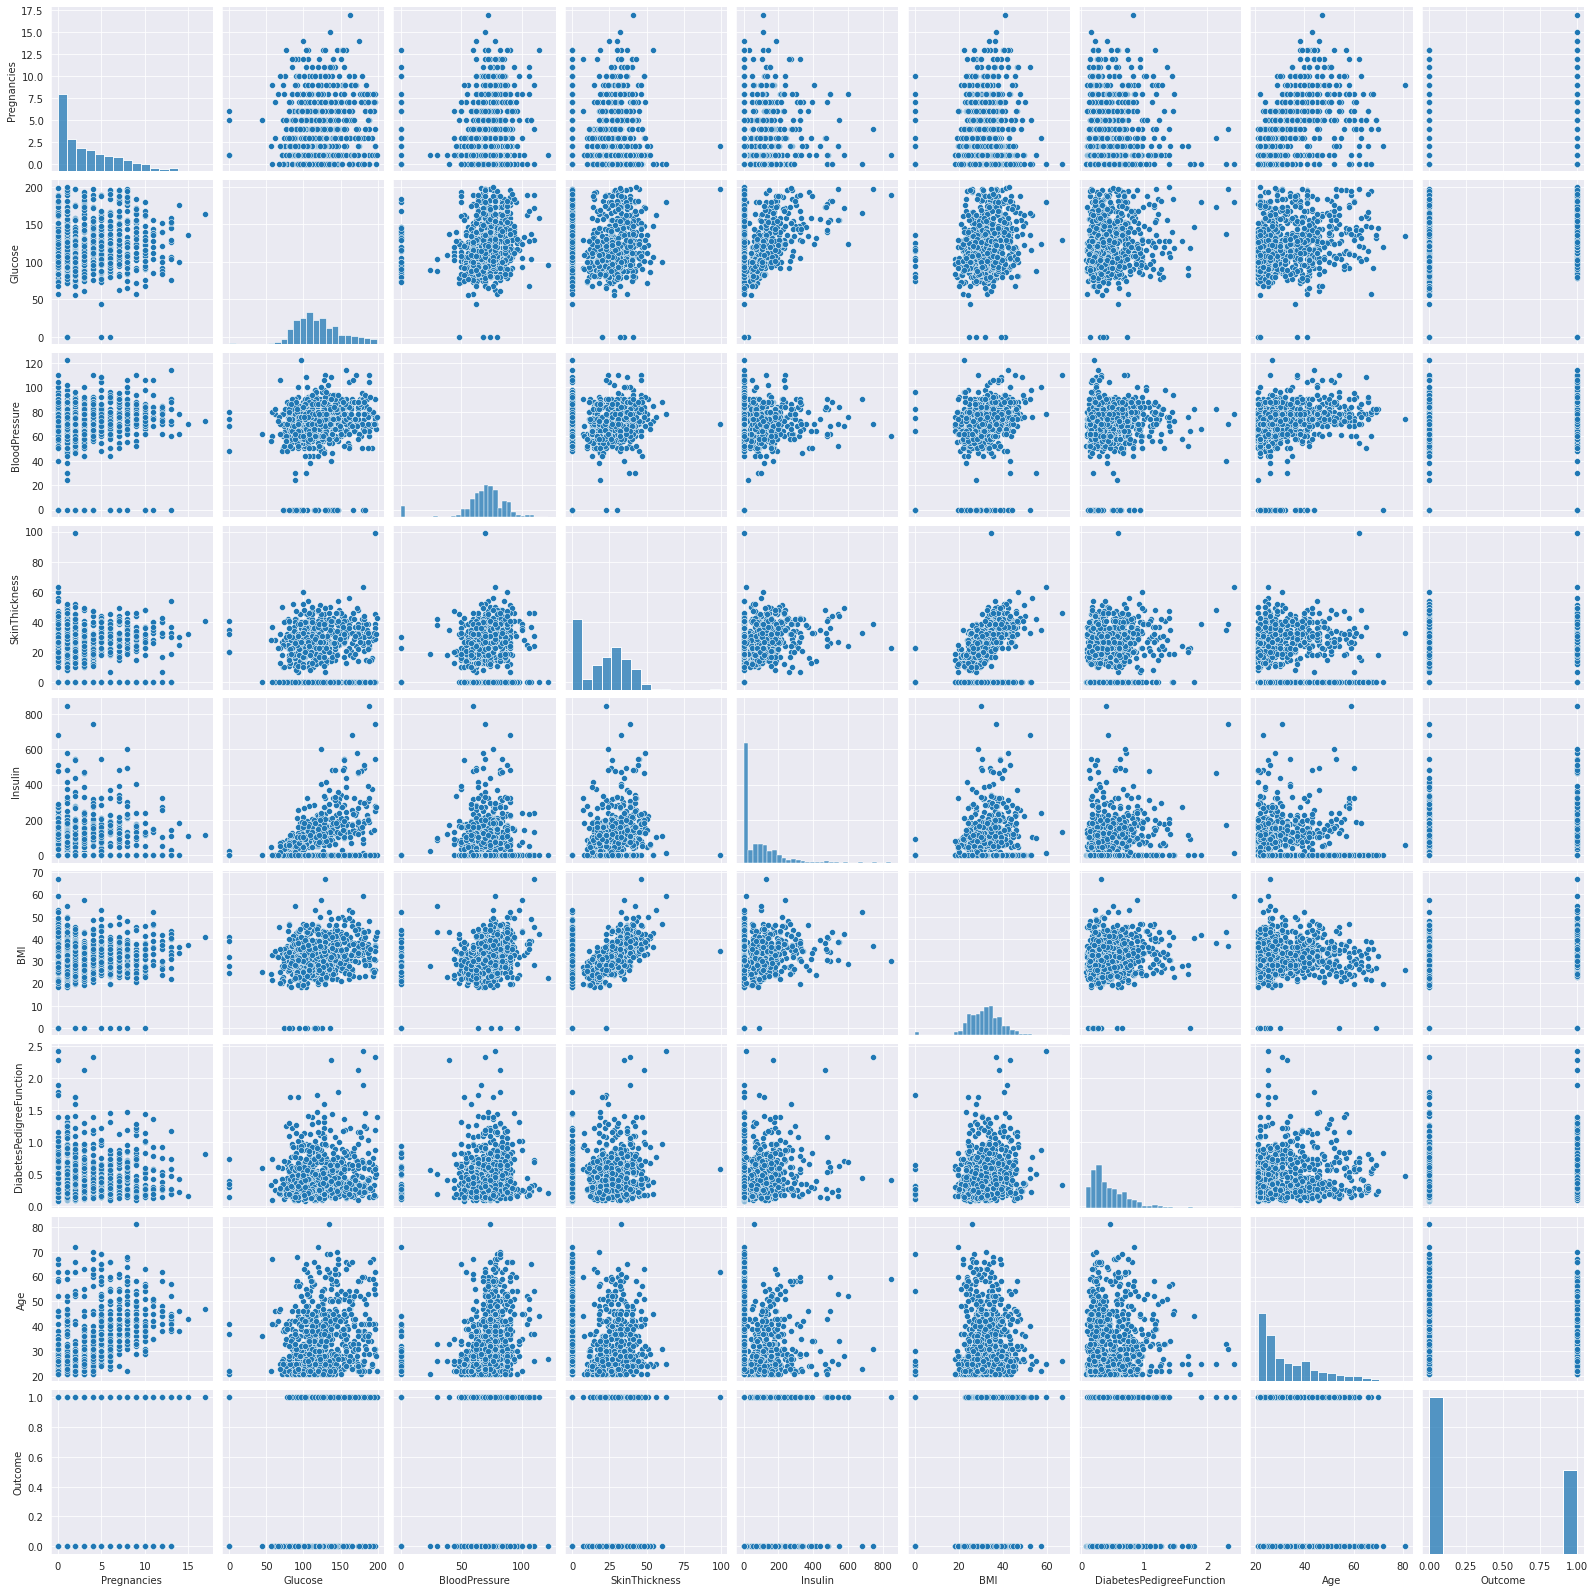

In [86]:
sns.pairplot(ds)

## **Handling Imbalance of dataset using Undersampling and oversampling**

In [87]:
X = ds[ds.columns[:-1]].values
y = ds['Outcome'].values

In [88]:
from imblearn import under_sampling
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_under, Y_under = rus.fit_resample(X, y)
# X,Y=RandomUnderSampler.fit_resample(x, y) 
counter=Counter(Y_under)
print(counter)

Counter({0: 268, 1: 268})


In [89]:
# to remove the biased we have to over sample the dataset
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_Over,Y_Over = over_sampler.fit_resample(X,y)
# Sampled_Dataset = X_Over.merge(Y_Over,left_index=True,right_index=True)
counter=Counter(Y_Over)
print(counter)

Counter({1: 500, 0: 500})


## **Split x and y into train and testing sets**

Actual Data

In [90]:
x=ds.iloc[:,:-1].values
Y=ds.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.20,random_state=0)

Split after undersampling

In [91]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_under,Y_under, train_size=0.7, test_size=0.3,random_state=0)

Split after oversampling

In [92]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_Over,Y_Over, train_size=0.7, test_size=0.3,random_state=0)

## **Applying Algorithms**

Logistic Regression

In [93]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (x_train , y_train)                     # Fitting a  model    
y_pred = logreg.predict(x_test)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(x_test)   # Predicted probabilities from test features
print ("Accuracy for Logistic Regression is : " , metrics.accuracy_score (y_test , y_pred))

Accuracy for Logistic Regression is :  0.8181818181818182


Model Validation ==>

[[96 11]
 [19 28]]
Accuracy Score of Logistic Regression Model::
0.8051948051948052

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154
 


 ROC Curve


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-94-9e7f0625e4dd>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


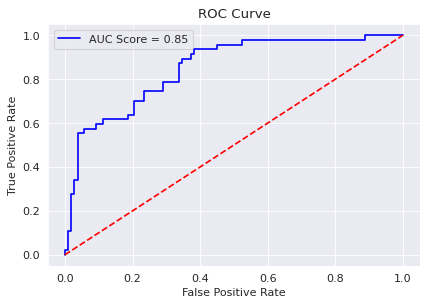

In [94]:
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)
print("Model Validation ==>\n")
print(confusion_matrix(y_test, lr_pred))
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_test)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [95]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train2 , Y_train2)                     # Fitting a  model    
y_pred = logreg.predict(X_test2)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(X_test2)   # Predicted probabilities from test features
print ("Accuracy for Logistic Regression after undersamlping is : " , metrics.accuracy_score (Y_test2 , y_pred))

Accuracy for Logistic Regression after undersamlping is :  0.7515527950310559


Model Validation ==>

[[64 15]
 [27 55]]
Accuracy Score of Logistic Regression Model::
0.7391304347826086

 Classification Report::
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        79
           1       0.79      0.67      0.72        82

    accuracy                           0.74       161
   macro avg       0.74      0.74      0.74       161
weighted avg       0.75      0.74      0.74       161
 


 ROC Curve


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-96-dff7ca3dc697>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


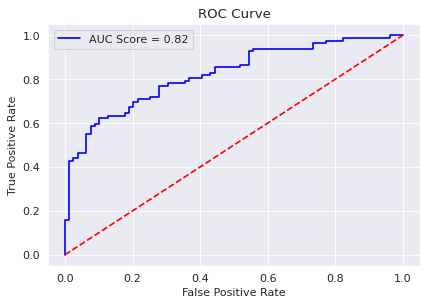

In [96]:
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(X_train2,Y_train2)
lr_pred=lr_model.predict(X_test2)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test2, lr_pred))
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(Y_test2,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test2,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(X_test2)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test2,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [97]:
logreg = LogisticRegression (solver = "liblinear")

logreg.fit (X_train1 , Y_train1)                     # Fitting a  model    
y_pred = logreg.predict(X_test1)                    # Predicted class labels from test features
y_predicted_proba = logreg.predict_proba(X_test1)   # Predicted probabilities from test features
print ("Accuracy for Logistic Regression after oversampling is : " , metrics.accuracy_score (Y_test1 , y_pred))

Accuracy for Logistic Regression after oversampling is :  0.78


Model Validation ==>

[[115  41]
 [ 37 107]]
Accuracy Score of Logistic Regression Model::
0.74

 Classification Report::
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       156
           1       0.72      0.74      0.73       144

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300
 


 ROC Curve


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-98-d9a9fc291704>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


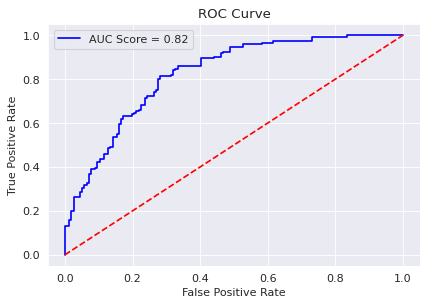

In [98]:
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(X_train1,Y_train1)
lr_pred=lr_model.predict(X_test1)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test1, lr_pred))
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(Y_test1,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test1,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(X_test1)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test1,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()


Random Forest

In [99]:
def Predict_RandomForest(X_train,Y_train,X_test,Y_test):
    model = RandomForestClassifier()
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print("Accuracy for Random Forest Classifier is : ",accuracy_score(predictions,Y_test))
    # return accuracy_score(predictions,y_test)
Predict_RandomForest(x_train,y_train,x_test,y_test)

Accuracy for Random Forest Classifier is :  0.8051948051948052


Model Validation ==>

[[95 12]
 [15 32]]
Accuracy Score of Random forest Model::
0.8246753246753247

 Classification Report::
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       107
           1       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154
 


 ROC Curve


<ipython-input-100-fea1a54eeb0d>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


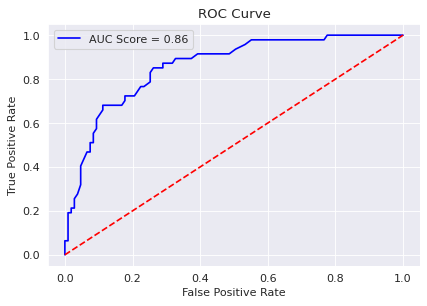

In [100]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print("Model Validation ==>\n")
print(confusion_matrix(y_test, predictions))
print("Accuracy Score of Random forest Model::")
print(metrics.accuracy_score(y_test,predictions))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,predictions),'\n')
print("\n","ROC Curve")
rf_prob=model.predict_proba(x_test)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [101]:
def Predict_RandomForest(X_train,Y_train,X_test,Y_test):
    model = RandomForestClassifier()
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print("Accuracy for Random Forest Classifier after undersamlping is : ",accuracy_score(predictions,Y_test))
    # return accuracy_score(predictions,y_test)
Predict_RandomForest(X_train2,Y_train2,X_test2,Y_test2)

Accuracy for Random Forest Classifier after undersamlping is :  0.6894409937888198


Model Validation ==>

[[59 20]
 [29 53]]
Accuracy Score of Random forest Model::
0.6956521739130435

 Classification Report::
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        79
           1       0.73      0.65      0.68        82

    accuracy                           0.70       161
   macro avg       0.70      0.70      0.70       161
weighted avg       0.70      0.70      0.70       161
 


 ROC Curve


<ipython-input-102-fb08640963ce>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


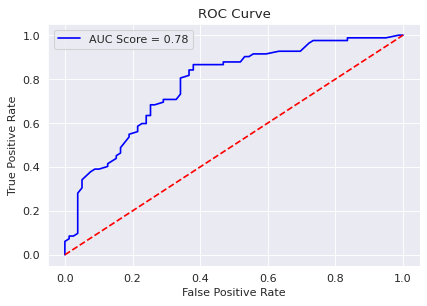

In [102]:
model = RandomForestClassifier()
model.fit(X_train2,Y_train2)
predictions = model.predict(X_test2)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test2, predictions))
print("Accuracy Score of Random forest Model::")
print(metrics.accuracy_score(Y_test2,predictions))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test2,predictions),'\n')
print("\n","ROC Curve")
rf_prob=model.predict_proba(X_test2)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test2,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [103]:
def Predict_RandomForest(X_train,Y_train,X_test,Y_test):
    model = RandomForestClassifier()
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print("Accuracy for Random Forest Classifier after oversampling is : ",accuracy_score(predictions,Y_test))
    # return accuracy_score(predictions,y_test)
Predict_RandomForest(X_train1,Y_train1,X_test1,Y_test1)

Accuracy for Random Forest Classifier after oversampling is :  0.8733333333333333


Model Validation ==>

[[129  27]
 [ 12 132]]
Accuracy Score of Random forest Model::
0.87

 Classification Report::
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       156
           1       0.83      0.92      0.87       144

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300
 


 ROC Curve


<ipython-input-104-5b7f4c15dfbe>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


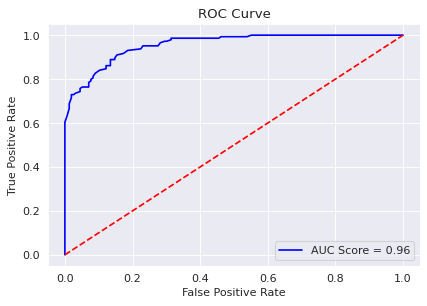

In [104]:
model = RandomForestClassifier()
model.fit(X_train1,Y_train1)
predictions = model.predict(X_test1)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test1, predictions))
print("Accuracy Score of Random forest Model::")
print(metrics.accuracy_score(Y_test1,predictions))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test1,predictions),'\n')
print("\n","ROC Curve")
rf_prob=model.predict_proba(X_test1)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test1,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

XGboost

In [105]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_cls = xgb.XGBClassifier()
type(xgb_cls)

xgb_cls.fit(x_train , y_train)

pred = xgb_cls.predict(x_test)
print("Accuracy for XGBoost is :  ",accuracy_score(y_test, pred))

Accuracy for XGBoost is :   0.7597402597402597


Model Validation ==>

[[86 21]
 [16 31]]
Accuracy Score of XGboost Model::
0.7597402597402597

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154
 


 ROC Curve


<ipython-input-106-6d4de3bc2988>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


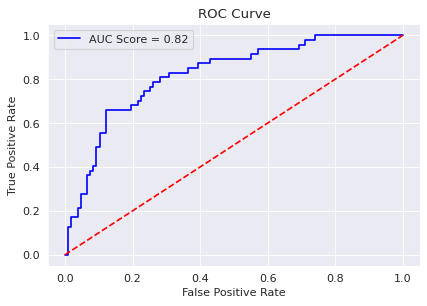

In [106]:
xg_model = xgb.XGBClassifier()
xg_model.fit(x_train,y_train)
xg_pred=xg_model.predict(x_test)
print("Model Validation ==>\n")
print(confusion_matrix(y_test, xg_pred))
print("Accuracy Score of XGboost Model::")
print(metrics.accuracy_score(y_test,xg_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,xg_pred),'\n')
print("\n","ROC Curve")
xg_prob=xg_model.predict_proba(x_test)
xg_prob1=xg_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,xg_prob1)
roc_auc_xg=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_xg)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [107]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_cls = xgb.XGBClassifier()
type(xgb_cls)

xgb_cls.fit(X_train2 , Y_train2)

pred = xgb_cls.predict(X_test2)
print("Accuracy for XGBoost after undersamlping is :  ",accuracy_score(Y_test2, pred))

Accuracy for XGBoost after undersamlping is :   0.6459627329192547


Model Validation ==>

[[54 25]
 [32 50]]
Accuracy Score of XGboost Model::
0.6459627329192547

 Classification Report::
              precision    recall  f1-score   support

           0       0.63      0.68      0.65        79
           1       0.67      0.61      0.64        82

    accuracy                           0.65       161
   macro avg       0.65      0.65      0.65       161
weighted avg       0.65      0.65      0.65       161
 


 ROC Curve


<ipython-input-108-0cb3985b0711>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


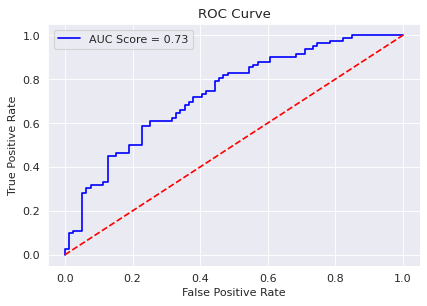

In [108]:
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train2,Y_train2)
xg_pred=xg_model.predict(X_test2)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test2, xg_pred))
print("Accuracy Score of XGboost Model::")
print(metrics.accuracy_score(Y_test2,xg_pred))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test2,xg_pred),'\n')
print("\n","ROC Curve")
xg_prob=xg_model.predict_proba(X_test2)
xg_prob1=xg_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test2,xg_prob1)
roc_auc_xg=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_xg)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [109]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_cls = xgb.XGBClassifier()
type(xgb_cls)

xgb_cls.fit(X_train1 , Y_train1)

pred = xgb_cls.predict(X_test1)
print("Accuracy for XGBoost after oversampling is :  ",accuracy_score(Y_test1, pred))

Accuracy for XGBoost after oversampling is :   0.8533333333333334


Model Validation ==>

[[124  32]
 [ 12 132]]
Accuracy Score of XGboost Model::
0.8533333333333334

 Classification Report::
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       156
           1       0.80      0.92      0.86       144

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300
 


 ROC Curve


<ipython-input-110-35997f001da7>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


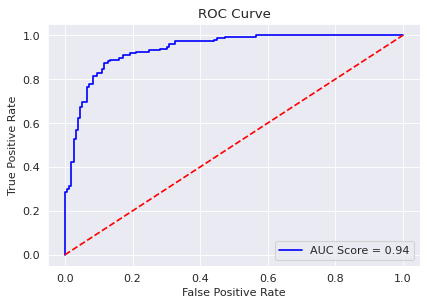

In [110]:
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train1,Y_train1)
xg_pred=xg_model.predict(X_test1)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test1, xg_pred))
print("Accuracy Score of XGboost Model::")
print(metrics.accuracy_score(Y_test1,xg_pred))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test1,xg_pred),'\n')
print("\n","ROC Curve")
xg_prob=xg_model.predict_proba(X_test1)
xg_prob1=xg_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test1,xg_prob1)
roc_auc_xg=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_xg)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

SVM

In [111]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(x_train , y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test , pred)
print("Accuracy for SVM is : ",accuracy)

Accuracy for SVM is :  0.8181818181818182


Model Validation ==>

[[97 10]
 [18 29]]
Accuracy Score of SVM Model::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154
 


 ROC Curve


<ipython-input-112-0cc96c27c11c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


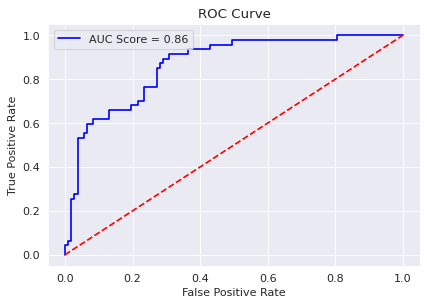

In [112]:
svm_model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True) 
svm_model.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)
print("Model Validation ==>\n")
print(confusion_matrix(y_test, svm_pred))
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(y_test,svm_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svm_pred),'\n')
print("\n","ROC Curve")
svm_prob=svm_model.predict_proba(x_test)
svm_prob1=svm_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svm_prob1)
roc_auc_svm=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svm)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [113]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train2 , Y_train2)
pred = model.predict(X_test2)
accuracy = accuracy_score(Y_test2 , pred)
print("Accuracy for SVM after undersamlping is : ",accuracy)

Accuracy for SVM after undersamlping is :  0.7204968944099379


Model Validation ==>

[[63 16]
 [29 53]]
Accuracy Score of SVM Model::
0.7204968944099379

 Classification Report::
              precision    recall  f1-score   support

           0       0.68      0.80      0.74        79
           1       0.77      0.65      0.70        82

    accuracy                           0.72       161
   macro avg       0.73      0.72      0.72       161
weighted avg       0.73      0.72      0.72       161
 


 ROC Curve


<ipython-input-114-1c13fcdb0634>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


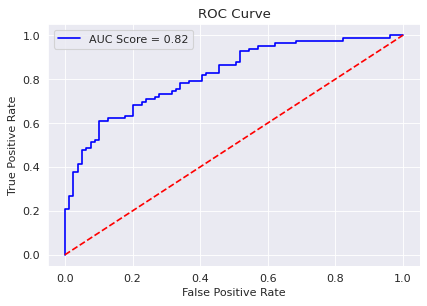

In [114]:
svm_model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True) 
svm_model.fit(X_train2,Y_train2)
svm_pred=svm_model.predict(X_test2)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test2, svm_pred))
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(Y_test2,svm_pred))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test2,svm_pred),'\n')
print("\n","ROC Curve")
svm_prob=svm_model.predict_proba(X_test2)
svm_prob1=svm_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test2,svm_prob1)
roc_auc_svm=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svm)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [115]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(X_train1 , Y_train1)
pred = model.predict(X_test1)
accuracy = accuracy_score(Y_test1 , pred)
print("Accuracy for SVM after oversampling is : ",accuracy)

Accuracy for SVM after oversampling is :  0.7666666666666667


Model Validation ==>

[[121  35]
 [ 35 109]]
Accuracy Score of SVM Model::
0.7666666666666667

 Classification Report::
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       156
           1       0.76      0.76      0.76       144

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300
 


 ROC Curve


<ipython-input-116-8659be20f3e0>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fpr,fpr,'r--',color='red')


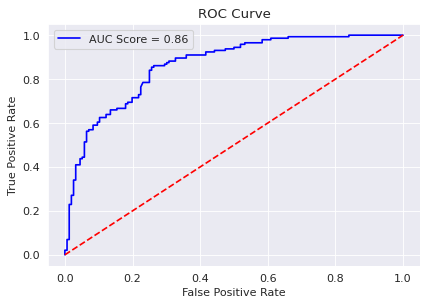

In [116]:
svm_model = SVC(kernel='linear',probability=True) 
svm_model.fit(X_train1,Y_train1)
svm_pred=svm_model.predict(X_test1)
print("Model Validation ==>\n")
print(confusion_matrix(Y_test1, svm_pred))
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(Y_test1,svm_pred))
print("\n","Classification Report::")
print(metrics.classification_report(Y_test1,svm_pred),'\n')
print("\n","ROC Curve")
svm_prob=svm_model.predict_proba(X_test1)
svm_prob1=svm_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(Y_test1,svm_prob1)
roc_auc_svm=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svm)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()